# Assignment Week 9
## Group Assignment (Group 10)

#### 1. Let $f(x)=x+2/x$.

#### (1) Use quadratic Lagrange interpolation based on the nodes $x_{0}=1$, $x_{1}=2$, and $x_{2}=2.5$ to approximate $f(1.5)$ and $f(1.2)$. 

**Answer**:
$$
\begin{aligned}
p_2(x)&=\frac{(x-2)(x-2.5)}{(1-2)(1-2.5)}\times 3+\frac{(x-1)(x-2.5)}{(2-1)(2-2.5)}\times 3+\frac{(x-1)(x-2)}{(2.5-1)(2.5-2)}\times 3.3\\
&=0.4x^2-1.2x+3.8
\end{aligned}
$$

So
$$
f(1.5)\approx p_2(1.5)=2.900\\
f(1.2)\approx p_2(1.2)=2.936
$$

**Script**:

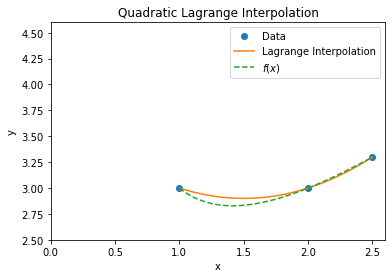

p₂(1.5) = 2.900
p₂(1.2) = 2.936


In [1]:
from numpy import array, dot, linspace
import matplotlib.pyplot as plt
%matplotlib inline

# the i-th Lagrange polynomial with respect to x
def lagrange(x, i, xData):
    n = len(xData) - 1  # the order of the polynomial
    lagrpoly = 1.
    for idx in range (n+1):
        if idx != i:
            lagrpoly *= ( x - xData[idx] ) / ( xData[i] - xData[idx])
    return lagrpoly

# Lagrange interpolation at x
def lagrange_interpolation(x, xData, yData):
    n = len(xData) - 1  # the order of the polynomial
    lagrpoly = array([lagrange(x, i, xData) for i in range(n+1)])
    y = dot(yData, lagrpoly)
    return y

xData = array([1, 2, 2.5])
yData = xData + 2 / xData

# plot
x = linspace(min(xData), max(xData), 100, endpoint=True)
y = lagrange_interpolation(x, xData, yData)
plt.title('Quadratic Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'o')
plt.plot(x, y)
plt.plot(x, x + 2 / x, '--')
plt.xlim(0, 2.6)
plt.ylim(2.5, 4.6)
plt.legend(['Data', 'Lagrange Interpolation', r'$f(x)$'])
plt.show()

p15 = lagrange_interpolation(1.5, xData, yData)
p12 = lagrange_interpolation(1.2, xData, yData)

print('p₂(1.5) = %.3f' % p15)
print('p₂(1.2) = %.3f' % p12)

#### (2) Use cubic Lagrange interpolation based on the nodes $x_{0}=0.5$, $x_{1}=1$, $x_{2}=2$, and $x_{3}=2.5$ to approximate $f(1.5)$ and $f(1.2)$.

In [6]:
from sympy import simplify
from sympy.abc import x

p_3=lambda x: (x-1)*(x-2)*(x-2.5)/(0.5-1)/(0.5-2)/(0.5-2.5)*4.5+(x-0.5)*(x-2)*(x-2.5)/(1-0.5)/(1-2)/(1-2.5)\
*3+(x-0.5)*(x-1)*(x-2.5)/(2-0.5)/(2-1)/(2-2.5)*3+(x-0.5)*(x-1)*(x-2)/(2.5-0.5)/(2.5-1)/(2.5-2)*3.3

s=simplify(p_3(x))

print('p₃(x) =', s)
s

p₃(x) = -0.8*x**3 + 4.8*x**2 - 8.8*x + 7.8


-0.8*x**3 + 4.8*x**2 - 8.8*x + 7.8

**Answer**:
$$
\begin{aligned}
p_3(x)=&\frac{(x-1)(x-2)(x-2.5)}{(0.5-1)(0.5-2)(0.5-2.5)}\times 4.5+\frac{(x-0.5)(x-2)(x-2.5)}{(1-0.5)(1-2)(1-2.5)}\times 3\\
&+\frac{(x-0.5)(x-1)(x-2.5)}{(2-0.5)(2-1)(2-2.5)}\times 3+\frac{(x-0.5)(x-1)(x-2)}{(2.5-0.5)(2.5-1)(2.5-2)}\times 3.3\\
=&-0.8x^3 + 4.8x^2 - 8.8x + 7.8
\end{aligned}
$$

So
$$
f(1.5)\approx p_3(1.5)=2.700\\
f(1.2)\approx p_3(1.2)=2.770
$$

**Script**:

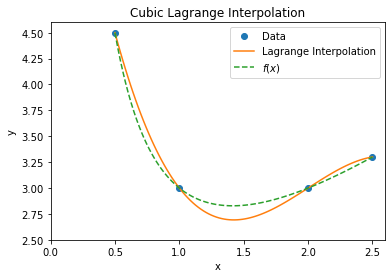

p₃(1.5) = 2.700
p₃(1.2) = 2.770


In [3]:
xData = array([0.5, 1, 2, 2.5])
yData = xData + 2 / xData

# plot
x = linspace(min(xData), max(xData), 100, endpoint=True)
y = lagrange_interpolation(x, xData, yData)
plt.title('Cubic Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'o')
plt.plot(x,y)
plt.plot(x, x + 2 / x, '--')
plt.xlim(0, 2.6)
plt.ylim(2.5, 4.6)
plt.legend(['Data', 'Lagrange Interpolation', r'$f(x)$'])
plt.show()

p15 = lagrange_interpolation(1.5, xData, yData)
p12 = lagrange_interpolation(1.2, xData, yData)

print('p₃(1.5) = %.3f' % p15)
print('p₃(1.2) = %.3f' % p12)

#### (3) Compare the results of (1) and (2), and discuss on it.

The true value of $f(1.5)$ and $f(1.2)$ are 2.833 and 2.867.
$$
\left\{
\begin{aligned}
&\Delta p_2(1.5)=f(1.5)-p_2(1.5)=-0.067,\ \Delta p_2(1.2)=f(1.2)-p_2(1.2)=-0.069\\
&\Delta p_3(1.5)=f(1.5)-p_3(1.5)=0.133,\ \Delta p_3(1.2)=f(1.2)-p_3(1.2)=0.097
\end{aligned}
\right.
$$

In this case, quadratic Lagrange interpolation has less error than cubic Lagrange interpolation. The point lies in that the latter doesn't use proper data points. Because the function $f(x)$ is steep when $x<1$, the data points fetched in the range $(0,\ 1]$ should be more dense than that in the range $[1,\ 2.5]$. A data point with $x=0.5$ cannot meet this requirement, so it increases the error. We can see this effect from the above plots.

If we take $x=0.8$, which is more close to $x=1$ than $x=0.5$, as the additional data point, the error will be much smaller. (see below)

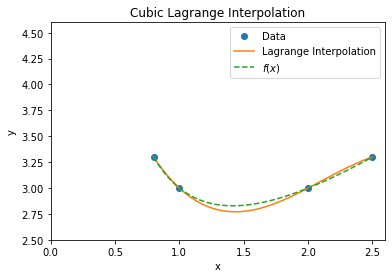

p₃(1.5) = 2.775
p₃(1.2) = 2.832
Δp₃(1.5) = 0.058, Δp₃(1.2) = 0.035


In [5]:
xData = array([0.8, 1, 2, 2.5])
yData = xData + 2 / xData

# plot
x = linspace(min(xData), max(xData), 100, endpoint=True)
y = lagrange_interpolation(x, xData, yData)
plt.title('Cubic Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'o')
plt.plot(x,y)
plt.plot(x, x + 2 / x, '--')
plt.xlim(0, 2.6)
plt.ylim(2.5, 4.6)
plt.legend(['Data', 'Lagrange Interpolation', r'$f(x)$'])
plt.show()

p15 = lagrange_interpolation(1.5, xData, yData)
p12 = lagrange_interpolation(1.2, xData, yData)

print('p₃(1.5) = %.3f' % p15)
print('p₃(1.2) = %.3f' % p12)
print('Δp₃(1.5) = %.3f, Δp₃(1.2) = %.3f' % (2.833 - p15, 2.867 - p12))

#### 3. Given the data in the following table, construct a divided differences table and interpolate at $x = 2.4$ and $x = 4.2$ using the fourth-degree Newton interpolating polynomial $p_4(x)$.

| $\ $  | $\ $ | $\ $ | $\ $ | $\ $ | $\ $ |
| ----- | ---- | ---- | ---- | ---- | ---- |
| $x_k$ | 1   | 2   | 3   | 4   | 6   |
| $f_k$ | 0.69 | 1.10 | 1.39 | 1.61 | 1.95 |

**Answer**:

| $i$ | $x_i$ | $f_i$ | 1st  | 2st  | 3st  | 4st  |
| --- | ----- | ----- | ---- | ---- | ---- | ---- |
|  0  |  1   | 0.69  | $\ $ | $\ $ | $\ $ | $\ $ |
|  1  |  2   | 1.10  | 0.41 | $\ $ | $\ $ | $\ $ |
|  2  |  3   | 1.39  | 0.29 | -0.060 | $\ $   | $\ $   |
|  3  |  4   | 1.61  | 0.22 | -0.035 | 0.0083 | $\ $    |
|  4  |  6   | 1.95  | 0.17 | -0.017 | 0.0046 | -0.00075 |

$$
\begin{aligned}
p_4(x)=&0.69+0.41(x-1)-0.060(x-1)(x-2)+0.0083(x-1)(x-2)(x-3)\\
&-0.00075(x-1)(x-2)(x-3)(x-4)\\
=&-0.00075x^4 + 0.0158x^3 - 0.13605x^2 + 0.7188x + 0.0922
\end{aligned}
$$

So
$$
f(2.4)\approx p_4(2.4)=1.23\\
f(4.2)\approx p_4(4.2)=1.65
$$

**Script**:

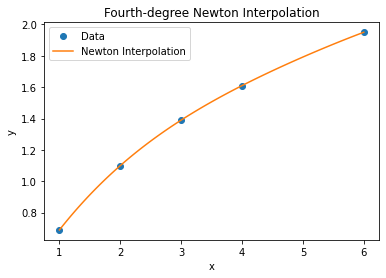

p_4(2.4) = 1.23
p_4(4.2) = 1.65


In [4]:
# the coefficients of Newton polynomials
def newton_coeff(xData, yData):
    a = yData.copy()
    m = len(xData)
    for k in range(1, m):  # m=n+1: number of data points
        for i in range(k, m):
            a[i] = (a[i] - a[k-1])/(xData[i] - xData[k-1])
    return a

# the interpolation value at x
def newton_eval(a, xData, x):
    m = len(xData)
    n = m - 1
    p = a[n]
    for k in range(1, m):
        p = a[n-k] + (x - xData[n-k]) * p
    return p

xData = array([1, 2, 3, 4, 6])
yData = array([0.69, 1.10, 1.39, 1.61, 1.95])

a = newton_coeff(xData, yData)

x = linspace(min(xData), max(xData), 100, endpoint=True)
y = newton_eval(a, xData, x)
plt.title('Fourth-degree Newton Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData,yData, 'o')
plt.plot(x,y)
plt.legend(['Data', 'Newton Interpolation'])
plt.show()

p24 = newton_eval(a, xData, 2.4)
p42 = newton_eval(a, xData, 4.2)
print('p_4(2.4) = %.2f' % p24)
print('p_4(4.2) = %.2f' % p42)

#### 5. The following table gives the value of the integral
$$
I(\alpha)=\int_{0}^{\pi/2}\frac{d\phi}{\sqrt{1-\sin^{2}\alpha\sin^{2}\phi}}
$$
#### for various values of $\alpha$. (This integral is the complete elliptical integral of the first kind.)

|   $\ $      | $\ $    | $\ $   | $\ $   | $\ $   | $\ $   |   $\ $ |
| --------------- | ------- | ------- | ------- | ------- | ------- | ------- |
| $\alpha$ ($°$) | 0     | 5     | 10    | 15     | 20    | 25     |
| $I$         | 1.57080 | 1.57379 | 1.58284 | 1.59814 | 1.62003 | 1.64900 |

#### (1) Using polynomial interpolation, find $I$ when $\alpha= 2°$.

Solve
$$
\begin{pmatrix}
1 & \alpha_0 & \alpha_0^2 & \cdots & \alpha_0^{5}\\
1 & \alpha_1 & \alpha_1^2 & \cdots & \alpha_1^{5}\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
1 & \alpha_5 & \alpha_5^2 & \cdots & \alpha_5^{5}\\
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1\\
\dots\\
a_5
\end{pmatrix}=
\begin{pmatrix}
I_0\\
I_1\\
\vdots \\
I_5
\end{pmatrix}
$$

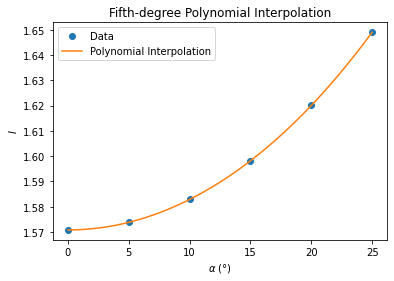

I = 1.57127 (when 𝛼 = 2°)


In [27]:
from numpy import array, pi, linspace, linalg
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
%matplotlib inline

# data
alpha_d = array([0, 5, 10, 15, 20, 25])  # unit: degree
alpha = alpha_d / 180 * pi  # unit: radian
I = array([1.57080, 1.57379, 1.58284, 1.59814, 1.62003, 1.64900])

n = len(alpha)-1  # the order of the polynomial
A = array([alpha**i for i in range(n+1)]).T  # Vandermonde matrix
a = linalg.solve(A, I)  # the coefficients of the polynomial
p = Polynomial(a)  # the polynomial interpolation

# plot
x = linspace(min(alpha_d), max(alpha_d), 100, endpoint=True)
y = p(x/180*pi)
plt.title('Fifth-degree Polynomial Interpolation')
plt.xlabel(r'$\alpha\ (°)$')
plt.ylabel(r'$I$')
plt.plot(alpha_d, I, 'o')
plt.plot(x, y)
plt.legend(['Data','Polynomial Interpolation'])
plt.show()

print('I = %.5f (when 𝛼 = 2°)' % p(2/180*pi))

#### (2) Use the trial-and-error search to find the value of $\alpha$ such that $I=1.58$.

From the table we can see that the value of $\alpha$ such that $I=1.58$ should be in the range from 5° to 10°.

In [14]:
from numpy import arange, argsort

x = arange(5/180*pi, 10/180*pi, 1e-5)  # 𝛼 ranges from 5° to 10°, step = 1e-5
index = argsort(abs(p(x)-1.58)) # the index of 𝛼 sorted by distance between p(𝛼) and 1.58
alpha_158 = x[index[0]]/pi*180  # the value of 𝛼 such that p(𝛼)=1.58

print('The value of 𝛼 such that I=1.58 is about %.1f°.' % alpha_158)

The value of 𝛼 such that I=1.58 is about 8.7°.


#### 7. The data in the following table shows the population of Canada recorded every 10 years between 1960 and 2010.

| Year | Population (millions) |
| ---- | --------------------- |
| 1960 | 17.9                  |
| 1970 | 21.3                  |
| 1980 | 24.6                  |
| 1990 | 27.8                  |
| 2000 | 30.8                  |
| 2010 | 34.1                  |

#### (1) Find the rate of population growth in 2010 using the three-point backward difference formula.

#### (2) Using the result of (1), and applying the two-point central difference formula, predict the population in Year 2020.